In [1]:
#import libraries
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
#from xgboost import plot_importance, plot_tree
#import graphviz
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report
import itertools
from functools import reduce

In [51]:
data = pd.read_csv("/home/agata/Pobrane/irysy.csv", delimiter=",")

In [52]:
data.describe()

,STATE,pollinator,Nectar,self,HAIRY
count,249.000000,146.000000,149.000000,130.000000,249.000000
mean,0.718876,1.020548,1.758389,0.323077,0.080321
std,0.450454,0.142354,0.459891,0.469461,0.272337
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2.000000,0.000000,0.000000
50%,1.000000,1.000000,2.000000,0.000000,0.000000
75%,1.000000,1.000000,2.000000,1.000000,0.000000
max,1.000000,2.000000,2.000000,1.000000,1.000000


In [53]:
data = data.drop(["self", "Species"], axis=1)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 16 columns):
Most common morph     249 non-null object
category              249 non-null object
STATE                 249 non-null int64
crest_colour          247 non-null object
Hair colour           247 non-null object
spot                  247 non-null object
Dark_spot             249 non-null object
habitat               244 non-null object
minimum               194 non-null object
maksimum              217 non-null object
geographical_range    248 non-null object
pollinator            146 non-null float64
Nectar                149 non-null float64
koncowka              249 non-null object
Bicolour              249 non-null object
HAIRY                 249 non-null int64
dtypes: float64(2), int64(2), object(12)
memory usage: 31.2+ KB


In [55]:
data = data.dropna()

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 7 to 248
Data columns (total 16 columns):
Most common morph     102 non-null object
category              102 non-null object
STATE                 102 non-null int64
crest_colour          102 non-null object
Hair colour           102 non-null object
spot                  102 non-null object
Dark_spot             102 non-null object
habitat               102 non-null object
minimum               102 non-null object
maksimum              102 non-null object
geographical_range    102 non-null object
pollinator            102 non-null float64
Nectar                102 non-null float64
koncowka              102 non-null object
Bicolour              102 non-null object
HAIRY                 102 non-null int64
dtypes: float64(2), int64(2), object(12)
memory usage: 13.5+ KB


In [58]:
data["pollinator"] = data.pollinator.astype(object)

In [59]:
data["Nectar"] = data.Nectar.astype(object)

In [65]:
X = data.drop(["Most common morph"], axis=1)
y = data["Most common morph"]

In [66]:
X = pd.get_dummies(X)

In [67]:
index = X.columns

In [68]:
models = [LogisticRegression(), SVC(), DecisionTreeClassifier(), RandomForestClassifier(),
         AdaBoostClassifier(), xgb.XGBClassifier(),
          BaggingClassifier(DecisionTreeClassifier(), bootstrap=False)]

for m in models:
    
    print("%s %.1f%%" % (m.__class__.__name__, cross_val_score(m,X,y,cv=3).mean()*100))

LogisticRegression 60.8%
SVC 58.8%
DecisionTreeClassifier 53.9%
RandomForestClassifier 56.9%
AdaBoostClassifier 52.9%


/home/agata/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/agata/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


XGBClassifier 57.8%
BaggingClassifier 53.9%


/home/agata/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [76]:
model = LogisticRegression()

In [77]:
y_pred = cross_val_predict(model, X, y, cv=3)
conf_mat = confusion_matrix(y, y_pred)
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

       anto       0.71      0.80      0.75        60
      white       0.00      0.00      0.00        12
     yellow       0.45      0.47      0.46        30

avg / total       0.55      0.61      0.58       102



In [78]:
y.value_counts()

anto      60
yellow    30
white     12
Name: Most common morph, dtype: int64

In [79]:
conf_mat

array([[48,  1, 11],
       [ 6,  0,  6],
       [14,  2, 14]])

In [80]:
labels=['anto', 'white', 'yellow']

In [81]:
#plotting confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[48  1 11]
 [ 6  0  6]
 [14  2 14]]


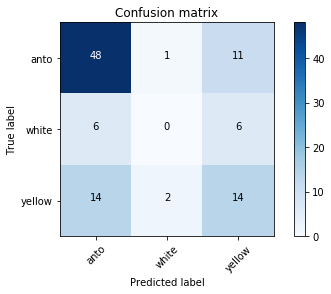

In [82]:
plt.figure()
plot_confusion_matrix(conf_mat, classes= labels,
                      title='Confusion matrix')
plt.show()

In [ ]:
model = xgb.XGBClassifier()
print(cross_val_score(model,X,y,cv=3).mean())
pd.Series(model.fit(X,y).feature_importances_, index = index).sort_values(ascending=False)
# Sort feature importances in descending order
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [index[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()